<a href="https://colab.research.google.com/github/safaltasaxena/deep-learning-mini-projects/blob/main/GPU%20benchmarking%20using%20ANN/GPU_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GPU benchmarking using ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()
#so its built w cuda thus we will be able to use gpu in our dl job

True

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
x_train.shape
#the 4rth dimension is RGB(color)

(50000, 32, 32, 3)

In [ ]:
y_train[0:5]
# 6 is code for frog 9 for truck and so on

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

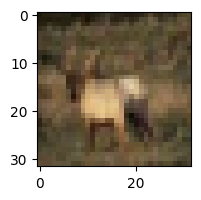

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(15,2))
  plt.imshow(x_train[index])
plot_sample(3)

In [ ]:
#assiging target
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes[y_train[3][0]]

'deer'

In [ ]:
#preprocessing scaling
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#one hot encoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [ ]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#model building
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    #32*32*3=3072 is the size of ip layer
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    #c_c when u have one hot encoded data and when discrete like handwritten digitts then s_c_c
    metrics=['accuracy']
)
model.fit(x_train_scaled,y_train_categorical,epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3030 - loss: 1.9314
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4203 - loss: 1.6454
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4573 - loss: 1.5473
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4726 - loss: 1.4977
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4946 - loss: 1.4310
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5118 - loss: 1.3871
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5221 - loss: 1.3495
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5366 - loss: 1.3170
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5528 - loss: 1.2770
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5589 - loss: 1.2614
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5705 - loss: 1.2216
Epoch 12/50
1563/1563 

In [ ]:
classes[y_test[0][0]]

'cat'

In [ ]:
#doing pred using trained model bascially w/o argamx we will get all proba we only need the maxm one
classes[np.argmax(model.predict(x_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'cat'

In [ ]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5634 - loss: 1.6064


[1.6074259281158447, 0.5543000102043152]

In [ ]:
#doing performance test cpu vs gpu
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
  ])
  model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )
  return model

In [ ]:
#to note time we will use
%%timeit -n1 -r1
#to run on cpu we have this syntax
with tf.device('/cpu:0'):
  cpu_model=get_model()
  cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.3045 - loss: 1.9293
3min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
#to run on gpu we have this syntax
with tf.device('/gpu:0'):
  gpu_model=get_model()
  gpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)
  #thus clearly we see how fast is gpu as compared to cpu cpu took 3min and gpu took 12 sec

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3022 - loss: 1.9329
12.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
